In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('Three data.xlsx')
df.head(10)

,Class,Heart_Rate,Cholestrol_Level,Triglycerides_Level,Fasting_Blood_Sugar
0,Nromal,61,126,78,96
1,Nromal,63,125,121,102
2,Nromal,53,111,136,98
3,Nromal,57,117,105,102
4,Nromal,70,100,77,98
5,Nromal,51,140,92,105
6,Nromal,73,106,83,97
7,Nromal,68,104,93,116
8,Nromal,62,115,107,85
9,Nromal,64,108,114,81


In [3]:
df.head()

,Class,Heart_Rate,Cholestrol_Level,Triglycerides_Level,Fasting_Blood_Sugar
0,Nromal,61,126,78,96
1,Nromal,63,125,121,102
2,Nromal,53,111,136,98
3,Nromal,57,117,105,102
4,Nromal,70,100,77,98


## EDA Analysis

In [4]:
df.shape  #very small data :( sad_ not a problem

(90, 5)

#### 1) Finding missing values in features

In [5]:
df.isnull().sum()

Class                  0
Heart_Rate             0
Cholestrol_Level       0
Triglycerides_Level    0
Fasting_Blood_Sugar    0
dtype: int64

#### 2) Checking numerical features

In [6]:
for feature in df.columns:
    print(f"{feature} has {df[feature].dtype} Type")

Class has object Type
Heart_Rate has int64 Type
Cholestrol_Level has int64 Type
Triglycerides_Level has int64 Type
Fasting_Blood_Sugar has int64 Type


In [7]:
numerical_feat=[feature for feature in df.columns if df[feature].dtype!='o']
numerical_feat

['Class',
 'Heart_Rate',
 'Cholestrol_Level',
 'Triglycerides_Level',
 'Fasting_Blood_Sugar']

#### 3) Finding continuous and discrete feature from numerical feature

In [8]:
continuous_feat=[]
discrete_feat=[]
for feature in numerical_feat:
    if len(df[feature].unique())<=10:
        discrete_feat.append(feature)
    else:
        continuous_feat.append(feature)
continuous_feat,discrete_feat

(['Heart_Rate',
  'Cholestrol_Level',
  'Triglycerides_Level',
  'Fasting_Blood_Sugar'],
 ['Class'])

In [9]:
#As class is our target variable so there is no feature of discrete value

#### 4) Histogram of Continuous Features

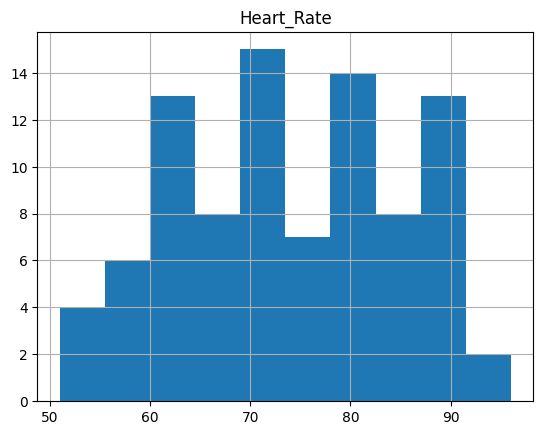

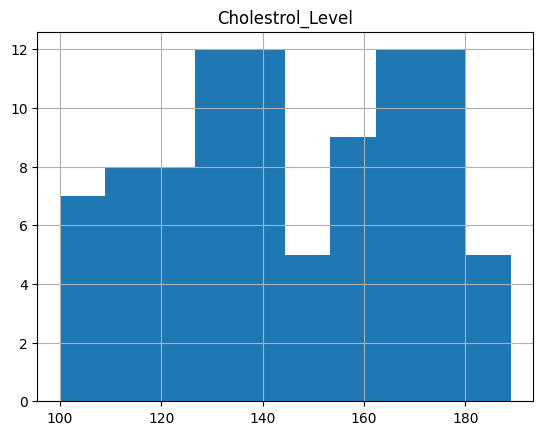

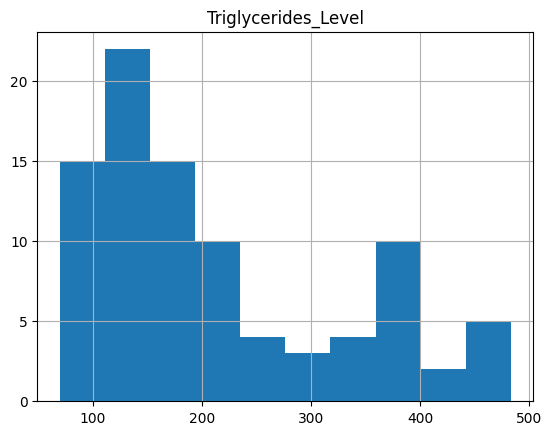

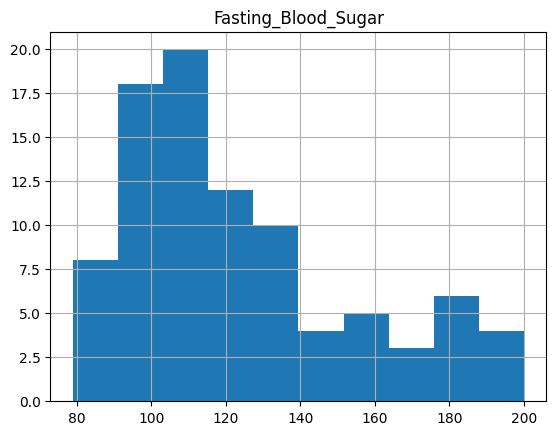

In [10]:
for feature in continuous_feat:
    df[feature].hist()
    plt.title(feature)
    plt.show()

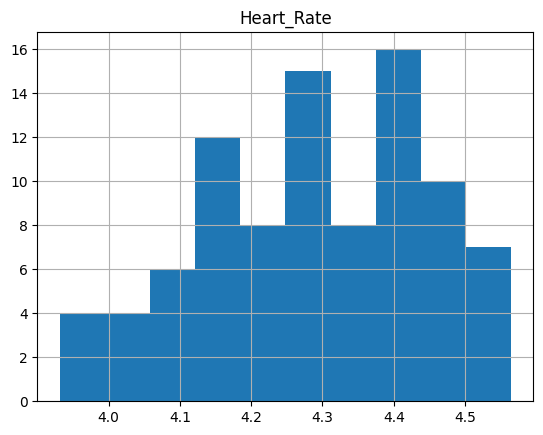

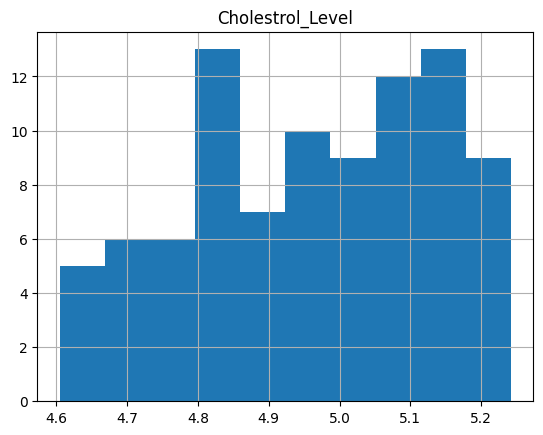

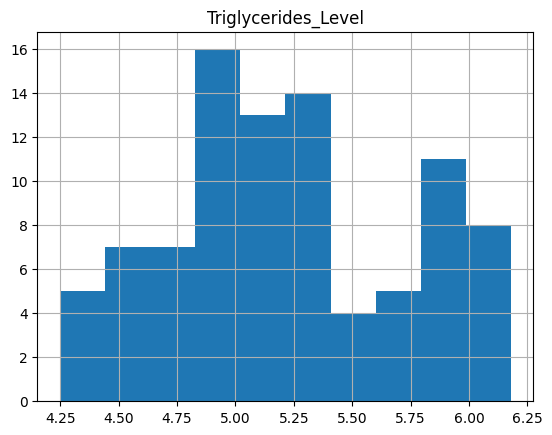

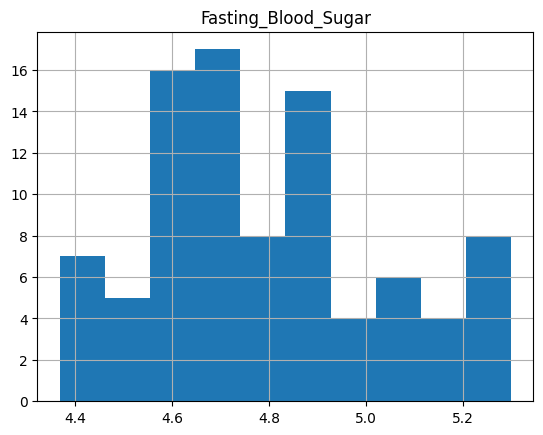

In [11]:
#convert it into guassian form and then plot
for feature in continuous_feat:
    np.log(df[feature]).hist()
    plt.title(feature)
    plt.show()

#### 5) Finding outliers only removing

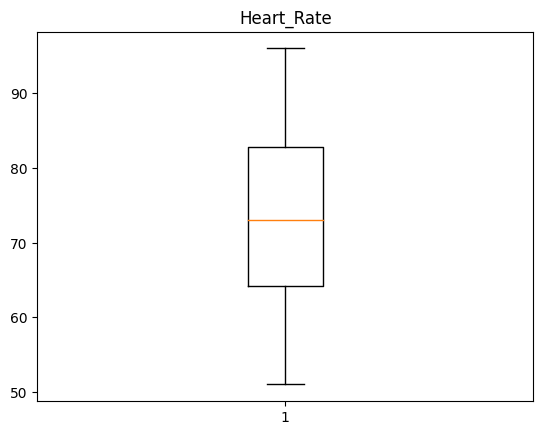

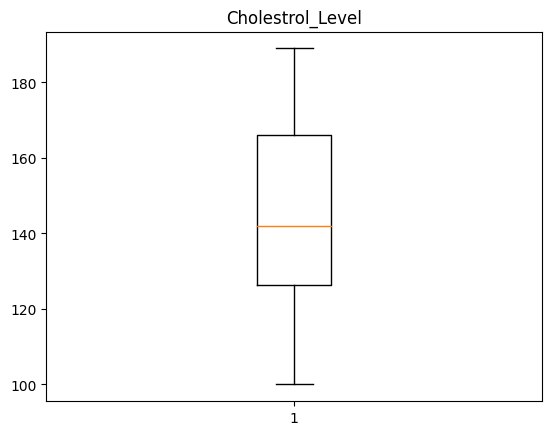

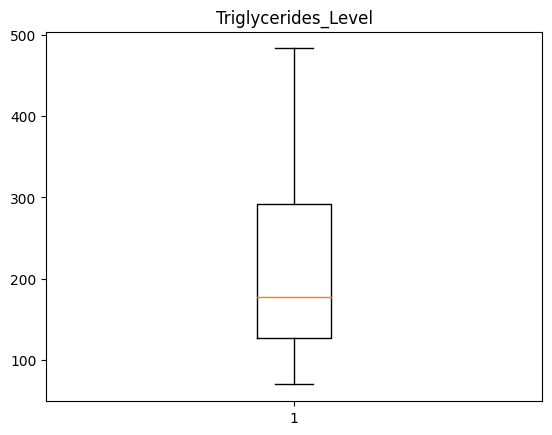

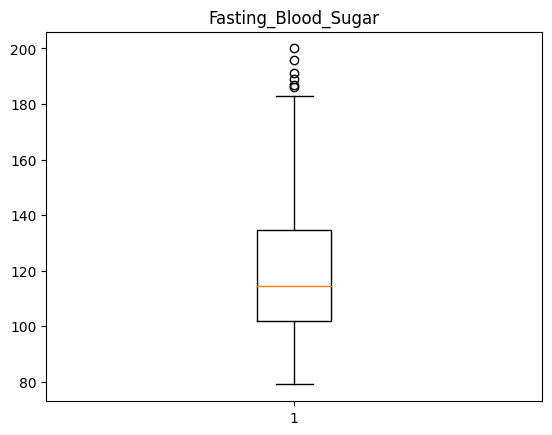

In [12]:
for feature in continuous_feat:
    plt.boxplot(df[feature])
    plt.title(feature)
    plt.show()

In [13]:
mean=df['Fasting_Blood_Sugar'].mean()
mean

124.27777777777777

In [14]:
out=df['Fasting_Blood_Sugar']>165
df.loc[out,'Fasting_Blood_Sugar']=mean

<Axes: >

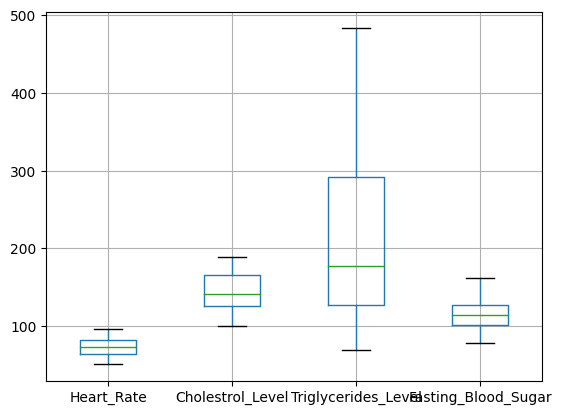

In [15]:
df.boxplot()

In [16]:
df.head()

,Class,Heart_Rate,Cholestrol_Level,Triglycerides_Level,Fasting_Blood_Sugar
0,Nromal,61,126,78,96.0
1,Nromal,63,125,121,102.0
2,Nromal,53,111,136,98.0
3,Nromal,57,117,105,102.0
4,Nromal,70,100,77,98.0


In [17]:
df['Class'].unique()

array(['Nromal', 'Borderline', 'High Risk'], dtype=object)

In [18]:
N=df['Class']=='Nromal'
df.loc[N,'Class']=0

In [19]:
B=df['Class']=='Borderline'
df.loc[B,'Class']=1

In [20]:
H=df['Class']=='High Risk'
df.loc[H,'Class']=2

In [22]:
df['Class'].unique()

array([0, 1, 2], dtype=object)

#### 6) finding relation between class and features

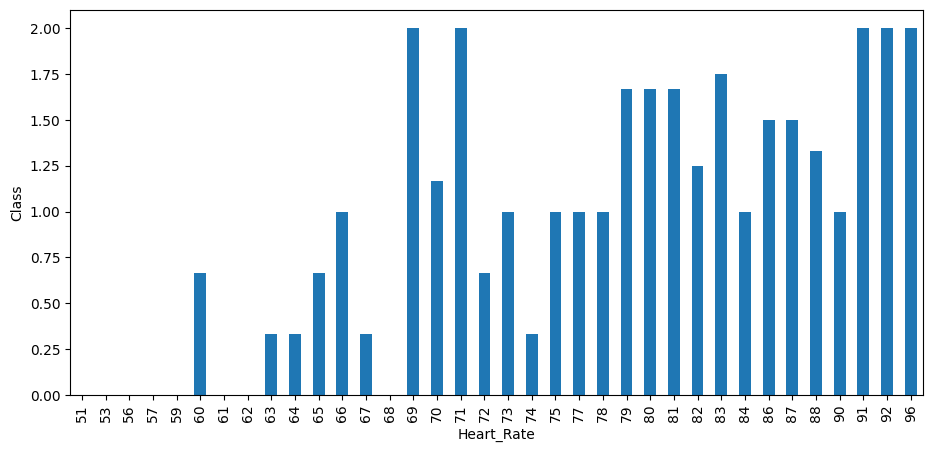

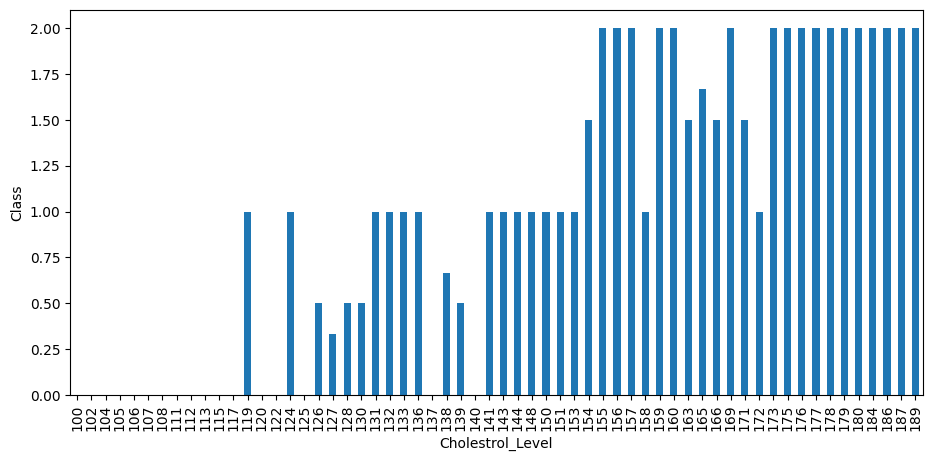

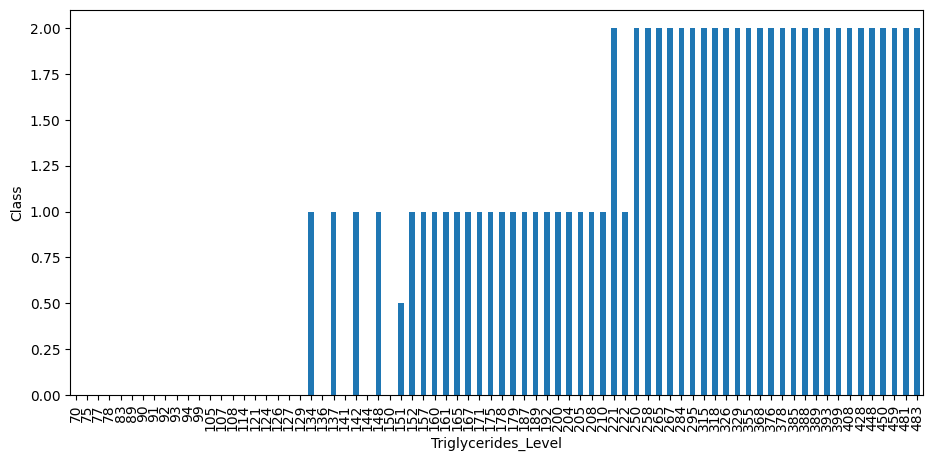

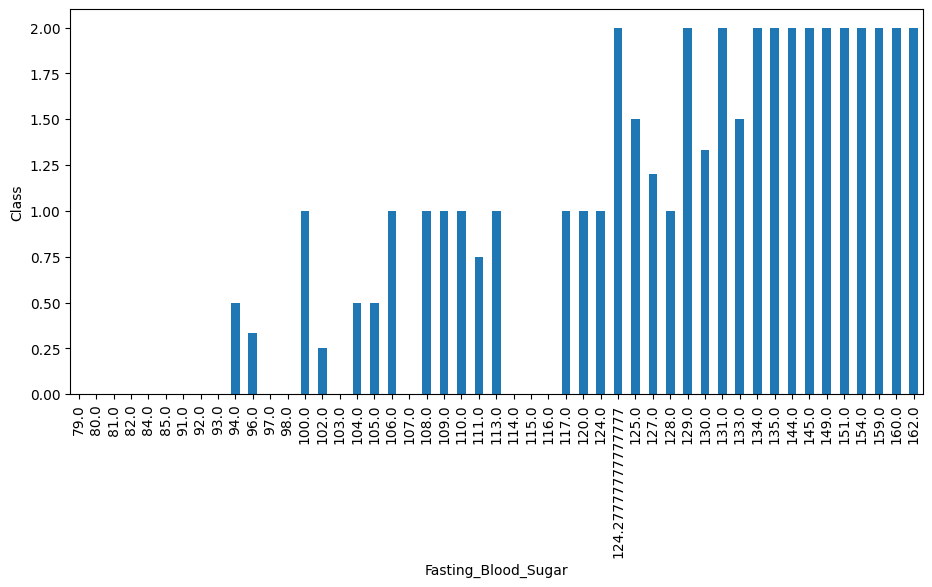

In [27]:
for feature in continuous_feat:
    plt.figure(figsize=(11,5))
    df.groupby(feature)['Class'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Class')
    plt.show()

#### 7) checking Categorical features

In [24]:
cat_feat=[feature for feature in df.columns if df[feature].dtype=='o']
cat_feat

[]

## Feature Engineering

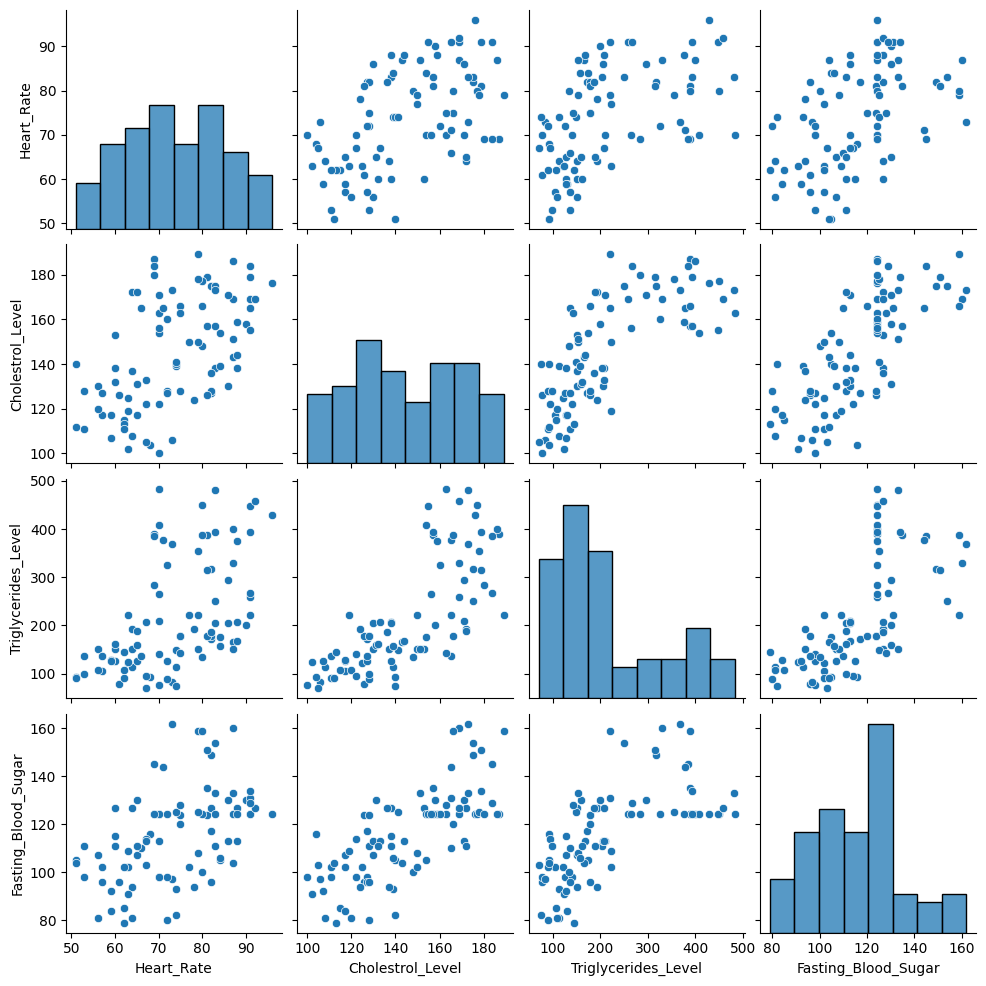

In [28]:
import seaborn as sns
sns.pairplot(df[continuous_feat])
plt.show()

In [29]:
df.columns

Index(['Class', 'Heart_Rate', 'Cholestrol_Level', 'Triglycerides_Level',
       'Fasting_Blood_Sugar'],
      dtype='object')

In [31]:
for feature in df.columns:
    print(f"{feature} has dtype of {df[feature].dtype}")

Class has dtype of object
Heart_Rate has dtype of int64
Cholestrol_Level has dtype of int64
Triglycerides_Level has dtype of int64
Fasting_Blood_Sugar has dtype of float64


In [35]:
df['Class']=df['Class'].astype('int64')

<Axes: >

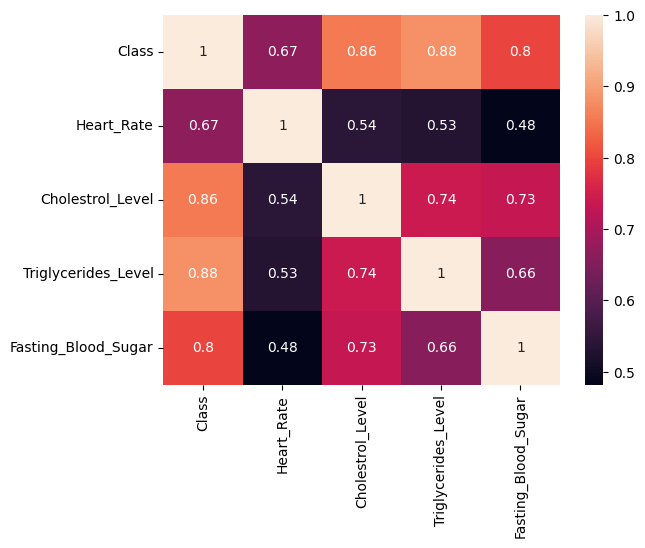

In [36]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True)

## Model development (with and without scaling) on 1st data frame(without feature Engineering)

In [57]:
df.head()

,Class,Heart_Rate,Cholestrol_Level,Triglycerides_Level,Fasting_Blood_Sugar
0,0,61,126,78,96.0
1,0,63,125,121,102.0
2,0,53,111,136,98.0
3,0,57,117,105,102.0
4,0,70,100,77,98.0


In [37]:
from sklearn.model_selection import train_test_split
X=df.drop('Class',axis=1)
Y=df['Class']

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape

((72, 4), (18, 4))

#### 1) SVC Model

In [39]:
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(X_train,Y_train)
print(f"SVC model has {(svc.score(X_test,Y_test))*100}% Accuracy")

SVC model has 94.44444444444444% Accuracy


#### 2) Random forest Model

In [40]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=1000,min_samples_split=2,max_depth=4,max_features='sqrt')
RF.fit(X_train,Y_train)
print(f"Random forest classifier model has {(RF.score(X_test,Y_test))*100}% Accuracy")

Random forest classifier model has 88.88888888888889% Accuracy


#### 3) Neural Networks 

In [67]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [69]:
Y_train_encoded = to_categorical(Y_train, num_classes=3)
classifier = Sequential()
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='relu', input_dim=4))  # 1st hidden layer + input layer
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='relu'))  # 2nd hidden layer
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='relu'))  # 3rd hidden layer
classifier.add(Dense(units=3, kernel_initializer='uniform', activation='softmax'))  # Output layer
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, Y_train_encoded, batch_size=10, epochs=500, validation_split=0.2)


Epoch 1/500
6/6 [==============================] - 2s 68ms/step - loss: 1.0989 - accuracy: 0.2632 - val_loss: 1.0978 - val_accuracy: 0.4000
Epoch 2/500
6/6 [==============================] - 0s 14ms/step - loss: 1.0982 - accuracy: 0.3509 - val_loss: 1.0976 - val_accuracy: 0.4000
Epoch 3/500
6/6 [==============================] - 0s 14ms/step - loss: 1.0976 - accuracy: 0.3509 - val_loss: 1.0971 - val_accuracy: 0.4000
Epoch 4/500
6/6 [==============================] - 0s 13ms/step - loss: 1.0967 - accuracy: 0.3509 - val_loss: 1.0955 - val_accuracy: 0.4000
Epoch 5/500
6/6 [==============================] - 0s 11ms/step - loss: 1.0955 - accuracy: 0.3509 - val_loss: 1.0929 - val_accuracy: 0.4000
Epoch 6/500
6/6 [==============================] - 0s 15ms/step - loss: 1.0932 - accuracy: 0.3509 - val_loss: 1.0893 - val_accuracy: 0.4000
Epoch 7/500
6/6 [==============================] - 0s 17ms/step - loss: 1.0897 - accuracy: 0.3509 - val_loss: 1.0822 - val_accuracy: 0.4000
Epoch 8/500
6/6 [===

In [70]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)  # Convert probabilities to class labels

# Creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

1/1 [==============================] - 0s 117ms/step
Confusion Matrix:
[[5 2 0]
 [4 3 0]
 [0 0 4]]


#### with scaling

In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_scaled=sc.transform(X_train)
X_test_scaled=sc.transform(X_test)

In [73]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

#### 1) SVC Model

In [74]:
from sklearn.svm import SVC
svc_s=SVC(kernel='rbf')
svc_s.fit(X_train_scaled,Y_train)
print(f"SVC model has {(svc_s.score(X_test_scaled,Y_test))*100}% Accuracy")

SVC model has 100.0% Accuracy


#### 2) Random forest Model

In [77]:
from sklearn.ensemble import RandomForestClassifier
RF_s=RandomForestClassifier(n_estimators=2000,min_samples_split=1,max_depth=8,max_features='log2')
RF_s.fit(X_train_scaled,Y_train)
print(f"Random forest classifier model has {(RF_s.score(X_test_scaled,Y_test))*100}% Accuracy")

Random forest classifier model has 88.88888888888889% Accuracy


#### 3) Neural Networks 

In [ ]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [78]:
Y_train_encoded = to_categorical(Y_train, num_classes=3)
classifier = Sequential()
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='relu', input_dim=4))  # 1st hidden layer + input layer
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='relu'))  # 2nd hidden layer
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='relu'))  # 3rd hidden layer
classifier.add(Dense(units=3, kernel_initializer='uniform', activation='softmax'))  # Output layer
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier.fit(X_train_scaled, Y_train_encoded, batch_size=10, epochs=500, validation_split=0.2)

Epoch 1/500
6/6 [==============================] - 1s 54ms/step - loss: 1.0988 - accuracy: 0.2982 - val_loss: 1.0987 - val_accuracy: 0.4000
Epoch 2/500
6/6 [==============================] - 0s 13ms/step - loss: 1.0985 - accuracy: 0.3509 - val_loss: 1.0990 - val_accuracy: 0.4000
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 1.0984 - accuracy: 0.3509 - val_loss: 1.0991 - val_accuracy: 0.4000
Epoch 4/500
6/6 [==============================] - 0s 14ms/step - loss: 1.0984 - accuracy: 0.3509 - val_loss: 1.0992 - val_accuracy: 0.4000
Epoch 5/500
6/6 [==============================] - 0s 15ms/step - loss: 1.0983 - accuracy: 0.3509 - val_loss: 1.0993 - val_accuracy: 0.4000
Epoch 6/500
6/6 [==============================] - 0s 16ms/step - loss: 1.0981 - accuracy: 0.3509 - val_loss: 1.0993 - val_accuracy: 0.4000
Epoch 7/500
6/6 [==============================] - 0s 14ms/step - loss: 1.0981 - accuracy: 0.3509 - val_loss: 1.0994 - val_accuracy: 0.4000
Epoch 8/500
6/6 [===

In [80]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=-1)  # Convert probabilities to class labels

# Creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

1/1 [==============================] - 0s 45ms/step
Confusion Matrix:
[[7 0 0]
 [0 6 1]
 [0 0 4]]


## 4) Model development (with scaling) on 2nd data frame(with feature Engineering and selection)

#### Feature Selection using Mutual classiff information method

In [81]:
S=pd.Series(Mutual)
S.index=X_train.columns
S.sort_values(ascending=False)

Triglycerides_Level    1.003758
Cholestrol_Level       0.612777
Fasting_Blood_Sugar    0.592513
Heart_Rate             0.365044
dtype: float64

<Axes: >

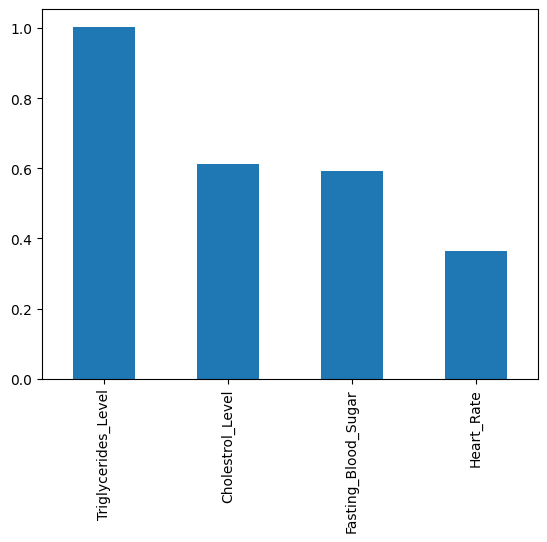

In [82]:
S.sort_values(ascending=False).plot.bar()

In [83]:
Sel=SelectKBest(mutual_info_classif,k=4)
Sel.fit(X_train_scaled,Y_train)
Sel.get_support()
select=X_train_scaled.columns[Sel.get_support()]

In [84]:
select=select.tolist()

In [85]:
X_train_scaled=X_train_scaled[select]
X_test_scaled=X_test_scaled[select]

#### SVM model after Feature engineering

In [86]:
from sklearn.svm import SVC
svc_s=SVC(kernel='rbf')
svc_s.fit(X_train_scaled,Y_train)
print(f"SVC model has {(svc_s.score(X_test_scaled,Y_test))*100}% Accuracy")

SVC model has 100.0% Accuracy


In [87]:
X_train_scaled.head()

,Heart_Rate,Cholestrol_Level,Triglycerides_Level,Fasting_Blood_Sugar
0,0.593676,1.391201,0.816422,1.821521
1,-1.245746,0.319902,-0.607132,0.582286
2,-2.034069,-1.369454,-1.127945,-0.605314
3,-0.107056,-1.616677,-1.197386,-0.966758
4,0.593676,0.484717,1.450077,0.995364


#### if we select feature greater than information of 50% them

In [88]:
X_train_scaled=X_train_scaled[['Fasting_Blood_Sugar','Cholestrol_Level']]
X_test_scaled=X_test_scaled[['Fasting_Blood_Sugar','Cholestrol_Level']]

In [91]:
from sklearn.svm import SVC
svc_s=SVC(kernel='poly')
svc_s.fit(X_train_scaled,Y_train)
print(f"SVC model has {(svc_s.score(X_test_scaled,Y_test))*100}% Accuracy")

SVC model has 83.33333333333334% Accuracy
